Optimization terminated successfully.
         Current function value: 15.398873
         Iterations: 69
         Function evaluations: 3008
         Gradient evaluations: 94


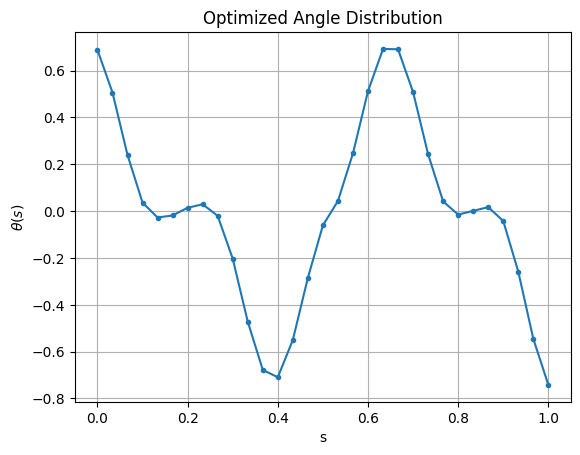

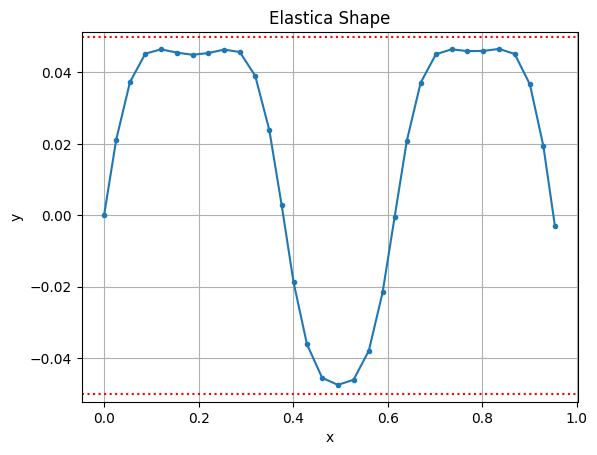

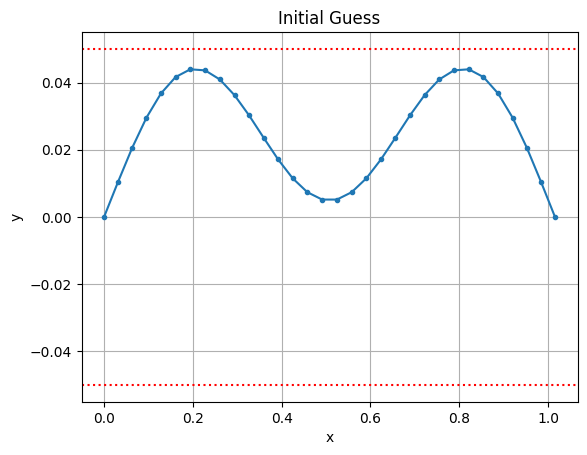

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters
penalty_coeff1 = 1e3
penalty_coeff2 = 1e3
n = 30  # number of segments #    19  27
p = 500  # dimensionless force # 400 500
c = 0.05  # distance beween channel edge and zero line

length = 1
s, h = np.linspace(0, length, n+1, retstep=True) # discretized arc-length

# theta0 = c/0.35*np.linspace(-1, 1, n+1) # initial guess for θ (length n+1)
A = 0.08
k = np.pi/length
B = 3
theta0 = A * (np.cos(k*s)+ B * np.cos(3*k*s))

def softplus(z, beta=1):
    return np.log1p(np.exp(beta * z)) / beta  # Stable and smooth

# Energy functional
def energy_functional(theta, p, h, c, penalty_coeff1, penalty_coeff2):
    n = len(theta) - 1
    diffs = np.diff(theta)  # theta[i+1] - theta[i], length n
    v = 0.5 * np.sum(diffs**2) + p / (n+1)**2 * np.sum(np.cos(theta))
    
    # dx = h * np.cos(theta[:n])  # increments in x direction for each segment
    dy = h * np.sin(theta[:n+2])  # increments in y direction for each segment

    # x = np.concatenate(([0], np.cumuative_sum(dx)))
    y = np.concatenate(([0], np.cumulative_sum(dy)))

    penalty = penalty_coeff1*np.sum(softplus(y**2 - c**2, beta=1e4)) + penalty_coeff2*y[-1]**2


    return v + penalty

# Minimize energy
res = minimize(fun=energy_functional, x0=theta0, args=(p, h, c, penalty_coeff1, penalty_coeff2), method="BFGS", options={"disp": True})

# Extract optimized theta
res_theta = res.x

# Plot theta(s)
plt.figure()
if n <= 30:
    plt.plot(s, res_theta, marker=".")
else:
    plt.plot(s, res_theta)
plt.xlabel("s")
plt.ylabel(r"$\theta(s)$")
plt.title("Optimized Angle Distribution")
plt.grid(True)
plt.show()

# Reconstruct curve (x, y)
x = [0]
y = [0]
for i in range(n+1):
    x.append(x[-1] + h * np.cos(res_theta[i]))
    y.append(y[-1] + h * np.sin(res_theta[i]))

x = np.array(x)
y = np.array(y)

# Plot shape
plt.figure()
if n <= 30:
    plt.plot(x, y, marker=".")
else:
    plt.plot(x, y)

plt.axhline(y=c, color='r', linestyle="dotted")
plt.axhline(y=-c, color='r', linestyle="dotted")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Elastica Shape")
plt.grid(True)
plt.show()

# Reconstruct curve (x, y)
x = [0]
y = [0]
for i in range(n+1):
    x.append(x[-1] + h * np.cos(theta0[i]))
    y.append(y[-1] + h * np.sin(theta0[i]))

x = np.array(x)
y = np.array(y)

# Plot shape
plt.figure()
if n <= 30:
    plt.plot(x, y, marker=".")
else:
    plt.plot(x, y)

plt.axhline(y=c, color='r', linestyle="dotted")
plt.axhline(y=-c, color='r', linestyle="dotted")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Initial Guess")
plt.grid(True)
plt.show()

14.972079126221512


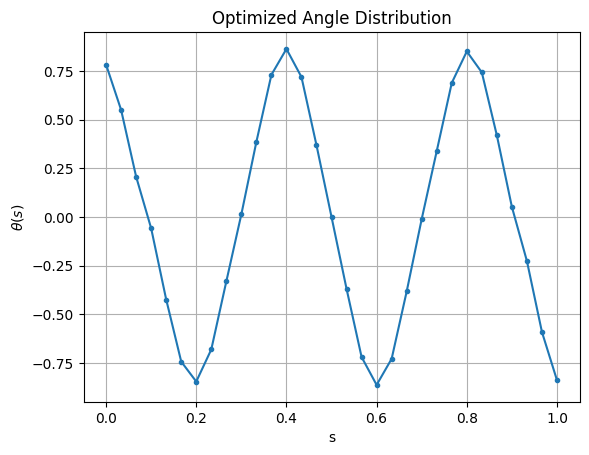

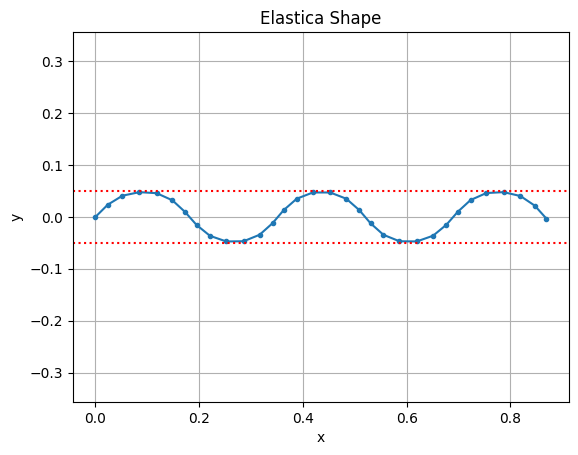

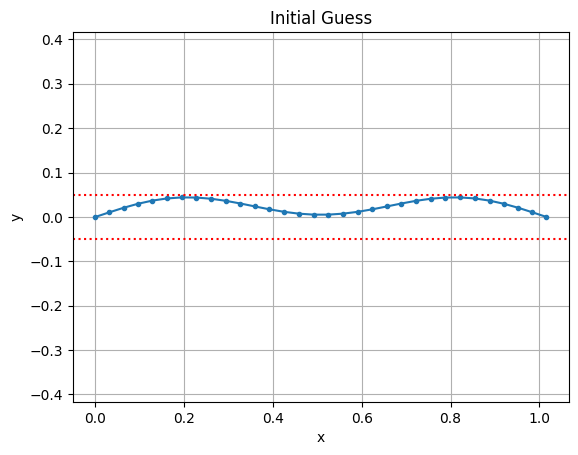

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import basinhopping

# Minimize energy
res = basinhopping(func=energy_functional, niter=30, T=8, x0=theta0, minimizer_kwargs={"method": "BFGS", "args": (p, h, c, penalty_coeff1, penalty_coeff2)})
print(res.fun)
# Extract optimized theta
res_theta = res.x

# Plot theta(s)
plt.figure()
if n <= 30:
    plt.plot(s, res_theta, marker=".")
else:
    plt.plot(s, res_theta)
plt.xlabel("s")
plt.ylabel(r"$\theta(s)$")
plt.title("Optimized Angle Distribution")
plt.grid(True)
plt.show()

# Reconstruct curve (x, y)
x = [0]
y = [0]
for i in range(n+1):
    x.append(x[-1] + h * np.cos(res_theta[i]))
    y.append(y[-1] + h * np.sin(res_theta[i]))

x = np.array(x)
y = np.array(y)

# Plot shape
plt.figure()
if n <= 30:
    plt.plot(x, y, marker=".")
else:
    plt.plot(x, y)

plt.axhline(y=c, color='r', linestyle="dotted")
plt.axhline(y=-c, color='r', linestyle="dotted")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Elastica Shape")
plt.axis("equal")
plt.grid(True)
plt.show()

# Reconstruct curve (x, y)
x = [0]
y = [0]
for i in range(n+1):
    x.append(x[-1] + h * np.cos(theta0[i]))
    y.append(y[-1] + h * np.sin(theta0[i]))

x = np.array(x)
y = np.array(y)

# Plot shape
plt.figure()
if n <= 30:
    plt.plot(x, y, marker=".")
else:
    plt.plot(x, y)

plt.axhline(y=c, color='r', linestyle="dotted")
plt.axhline(y=-c, color='r', linestyle="dotted")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Initial Guess")
plt.axis("equal")
plt.grid(True)
plt.show()

